# Центральная предельная теорема своими руками
## Треугольное распределение
Математическое ожидание $EX = \frac{1}{3}(a+b+c)$

Дисперсия $DX = \frac{1}{18}(a^2+b^2+c^2-a*b-a*c-b*c)$

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Теоретические значения мат. ожидания и дисперсии:
0.386 0.0481646666667


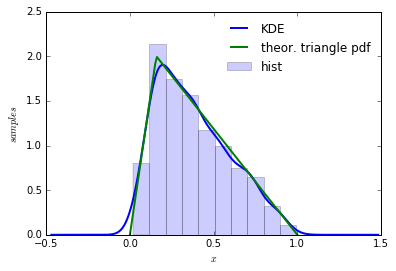

In [94]:
# Параметры треугольного распределения
c = 0.158
loc_ = 0.
scale_ = 1.

a = loc_
b = loc_ + scale_

# Сделаем выборку объёма 1000 и рассчитаем теоретические значения мат. ожидания и дисперсии
rv = sts.triang(c, loc=loc_, scale = scale_)
sample = rv.rvs(1000)

EX = (a+b+c)/3
DX = (a*a+b*b+c*c-a*b-a*c-b*c)/18.
print 'Теоретические значения мат. ожидания и дисперсии:'
print EX, DX
#print rv.mean(), rv.var()

# Эмпирическая оценка плотности, построенная с помощью ядерного сглаживания
df = pd.DataFrame(sample, columns = ['KDE'])
ax = df.plot(kind = 'density', lw=2)
# Построим PDF для треугольного распределения
x = np.linspace(0, 1.0, 100)
ax = plt.plot(x, rv.pdf(x), color='g', lw=2, label='theor. triangle pdf')
# Отобразим гистограмму
ax = plt.hist(sample, normed=True, alpha=0.2, label='hist', color='b')

# Подпишем оси
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$samples$')
plt.show()

In [100]:
# Вспомогательная функция
# Возвращает выборку длины length выборочных средних для выборок длины n из распределения rv
def sample_n(n, rv, length=1000):
    return [np.mean(rv.rvs(size=n)) for x in xrange(length)]

# Выборки для n = 5, 10, 50
samples = [(n, sample_n(n, sts.triang(c))) for n in [5, 10, 50]]

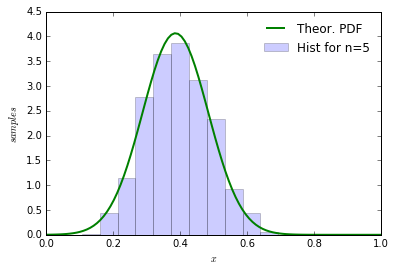

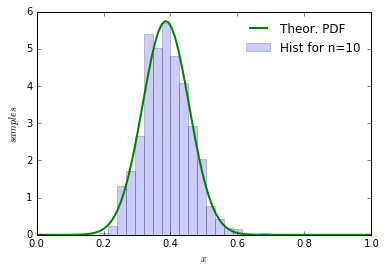

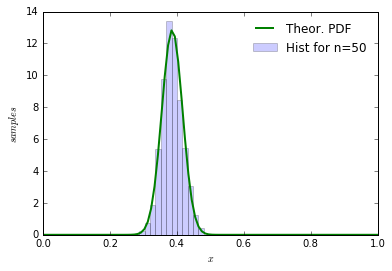

In [101]:
# Для каждого значения n отобразим соответствующие графики
for n, sample in samples:
    bins = 50 if n == 50 else n * 3

    # Теоретическая плотность распределения
    scaled_DX = np.sqrt(DX / float(n))
    plt.plot(x, sts.norm.pdf(x, loc=EX, scale=scaled_DX), color='g', lw=2, label="Theor. PDF")
    
    # Гистограмма
    plt.hist(sample, normed=True, alpha=0.2, label="Hist for n={sz}".format(sz=n), bins=bins, range=[0.0, 0.8], color='b')
    
    plt.legend(loc='best', frameon=False)
    plt.xlabel("$x$")
    plt.ylabel("$samples$".format(m=EX, v=round(scaled_var, 3)))
    plt.show()

### Вывод
Распределение выборочных средних случайной величины приближается нормальным распределением в соответствии с центральной предельной теоремой. Точность аппроксимации тем выше, чем больше количество элементов в выборке, т.е. дисперсия уменьшается с увеличением n.